In [2]:
from PIL import Image

## Linear Regression

전반적인 정리<br> 
ex) 공부한 정도의 성적 <br>
ex) 0~100 이기에 regression 종류

|**x(hours)**|**y(score)**|
|:-: |:-:|
|10|90|
|9|80|
|3|50|
|2|30|

이러한 데이터를 이용하여 train을 시켜 regression을 만들어 x값을 넣어 y값을 예측

<b>(Linear) Hypothesis</b><br>

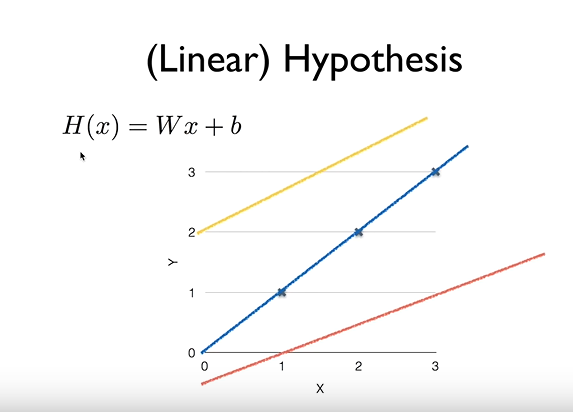

In [3]:
Image.open('선형.png')

H(x) = Wx + b <br>
W 와 b로 인하여 선형의 위치가 달라진다.


<b> Cost function</b><br>
- 측정값과 트레이닝된 식의 차이가 얼마 되는지 ??
- cost(W,b) =(H(x) - y)^2 / 데이터 갯수  |  제곱을 하는 이유는 차이가 벌어질수록 더 큰 값으로 보여지고 다 더하면 0이 되기 때문
- cost가 가장 작은 W,b 를 구하는 것이 Linear Regression 의 학습목표이다.

----

In [5]:
import tensorflow as tf

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# H(x) = Wx + b 
x_train = [1,2,3]
y_train = [1,2,3]

#Variable 을 통해 w , b 를 정함 
#train을 할 때 영향을 미친다.
w= tf.Variable(tf.random_normal([1]),name='weight')
b= tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = x_train * w + b 

In [7]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [8]:
#minimize 그래프 구현 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# w, b  만든 것을 실행하기 위해서는 반드시 

In [12]:
for step in range(2001):
    sess.run(train)
    if step % 20 == 0: # 20번에 한번씩
        print(step, sess.run(cost),sess.run(w),sess.run(b))
#  minimize로 w 와 b 를 연결     
# 그 과정을 for문으로 
# cost 와 w 와 b 의 값을 봄

0 2.1013591e-10 [0.9999833] [3.8245675e-05]
20 1.8883384e-10 [0.9999841] [3.637488e-05]
40 1.7208872e-10 [0.9999848] [3.4608205e-05]
60 1.5596413e-10 [0.9999855] [3.294165e-05]
80 1.4046009e-10 [0.99998623] [3.136412e-05]
100 1.2875508e-10 [0.9999869] [2.9875593e-05]
120 1.1759009e-10 [0.9999875] [2.8464148e-05]
140 1.0588034e-10 [0.9999881] [2.7136157e-05]
160 9.663855e-11 [0.99998856] [2.586538e-05]
180 8.727833e-11 [0.9999891] [2.4670902e-05]
200 7.901235e-11 [0.99998957] [2.3547958e-05]
220 7.2726415e-11 [0.99999005] [2.2477458e-05]
240 6.654943e-11 [0.9999905] [2.146577e-05]
260 6.0405604e-11 [0.99999094] [2.0520049e-05]
280 5.561655e-11 [0.9999913] [1.9606116e-05]
300 5.0197475e-11 [0.99999166] [1.8758936e-05]
320 4.647897e-11 [0.999992] [1.7945933e-05]
340 4.2443087e-11 [0.9999924] [1.7197293e-05]
360 3.9321435e-11 [0.99999267] [1.6461363e-05]
380 3.6195047e-11 [0.9999929] [1.5784253e-05]
400 3.3916574e-11 [0.9999932] [1.5138938e-05]
420 3.0302278e-11 [0.99999344] [1.4522229e-05

train -  cost - hypothesis - w,b <br>
이런 식으로 연결이 되어 있음

---
## <b> Placeholders

In [13]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [14]:
for step in range(2001):
    cost_val, w_val,b_val, _ = \
        sess.run([cost,w,b,train],#리스트에 넣어서 한번에 실행
                feed_dict={x:[1,2,3], y:[1,2,3]})
    # feed_dict 로 값을 넘겨줌 
    if step % 20 == 0:
        print(step,cost_val,w_val,b_val)

0 3.0695446e-12 [0.99999785] [4.350438e-06]
20 3.0695446e-12 [0.99999785] [4.350438e-06]
40 3.0695446e-12 [0.99999785] [4.350438e-06]
60 3.0695446e-12 [0.99999785] [4.350438e-06]
80 3.0695446e-12 [0.99999785] [4.350438e-06]
100 3.0695446e-12 [0.99999785] [4.350438e-06]
120 3.0695446e-12 [0.99999785] [4.350438e-06]
140 3.0695446e-12 [0.99999785] [4.350438e-06]
160 3.0695446e-12 [0.99999785] [4.350438e-06]
180 3.0695446e-12 [0.99999785] [4.350438e-06]
200 3.0695446e-12 [0.99999785] [4.350438e-06]
220 3.0695446e-12 [0.99999785] [4.350438e-06]
240 3.0695446e-12 [0.99999785] [4.350438e-06]
260 3.0695446e-12 [0.99999785] [4.350438e-06]
280 3.0695446e-12 [0.99999785] [4.350438e-06]
300 3.0695446e-12 [0.99999785] [4.350438e-06]
320 3.0695446e-12 [0.99999785] [4.350438e-06]
340 3.0695446e-12 [0.99999785] [4.350438e-06]
360 3.0695446e-12 [0.99999785] [4.350438e-06]
380 3.0695446e-12 [0.99999785] [4.350438e-06]
400 3.0695446e-12 [0.99999785] [4.350438e-06]
420 3.0695446e-12 [0.99999785] [4.350438

---
## <b> Full code with placeholders

In [22]:
w= tf.Variable(tf.random_normal([1]),name='weight')
b= tf.Variable(tf.random_normal([1]),name='bias')
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

In [23]:
hypothesis = x * w + b 
cost = tf.reduce_mean(tf.square(hypothesis - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [24]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
for step in range(2001):
    cost_val, w_val,b_val, _ = sess.run([cost,w,b,train],
        feed_dict={x:[1,2,3,4,5],
                   y:[2.1,3.1,4.1,5.1,6.1]})
    if step % 20 == 0:
        print(step,cost_val,w_val,b_val)
        # 예상 w = 1 , b=1.1

0 1.9742984e-07 [1.0002877] [1.0989618]
20 1.7251833e-07 [1.0002687] [1.0990297]
40 1.5076922e-07 [1.0002513] [1.0990931]
60 1.3165986e-07 [1.0002347] [1.0991523]
80 1.15016746e-07 [1.0002195] [1.0992079]
100 1.0054274e-07 [1.0002052] [1.0992594]
120 8.7662656e-08 [1.0001917] [1.0993081]
140 7.6660854e-08 [1.0001792] [1.0993532]
160 6.695336e-08 [1.0001674] [1.0993954]
180 5.8447505e-08 [1.0001565] [1.099435]
200 5.1090183e-08 [1.0001464] [1.0994719]
220 4.4651188e-08 [1.0001367] [1.0995063]
240 3.900241e-08 [1.0001277] [1.0995387]
260 3.4001925e-08 [1.0001194] [1.099569]
280 2.9698185e-08 [1.0001116] [1.0995972]
300 2.600574e-08 [1.0001044] [1.0996234]
320 2.2720542e-08 [1.0000974] [1.0996476]
340 1.9855998e-08 [1.0000911] [1.0996709]
360 1.7340744e-08 [1.0000852] [1.0996923]
380 1.5180479e-08 [1.0000798] [1.0997123]
400 1.3242527e-08 [1.0000745] [1.0997313]
420 1.1622433e-08 [1.0000697] [1.0997483]
440 1.0129952e-08 [1.000065] [1.099765]
460 8.820416e-09 [1.0000607] [1.0997804]
480 7

In [27]:
# train된 hypothesis 를 값을 넣어서 실행
print(sess.run(hypothesis,feed_dict={x:[5]})) 
print(sess.run(hypothesis,feed_dict={x:[2.5]}))
print(sess.run(hypothesis,feed_dict={x:[1.5,3.5]}))
#거의 유사하게 나오는것을 확인

[6.1000085]
[3.5999942]
[2.5999885 4.6      ]


1. 그래프를 만듬
2. feed_dict로 학습을 시킴
3. 학습으로 업데이트를 시킴
4. 제대로 된 return값이 나오는지 확인